#### Hi all.  🙋

#### We continue our **Beginner-Intermediate Friendly Machine Learning series**, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 



#### In this notebook we will  implement **End to End Prediction Model** by using different ML algorithms**
#### Enjoy 🤘

![](https://media.giphy.com/media/3ov9jWu7BuHufyLs7m/giphy.gif?cid=ecf05e47q8liqtbxy73738g13h2ofqf9nm9q82lm3py081io&rid=giphy.gif&ct=g)

gif credit: https://giphy.com/gifs/girl-life-car-3ov9jWu7BuHufyLs7m

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Numerical Features](#4)
    * [Categorical Features](#5)    
    
* [Model Selection](#6)    
    * [Baseline Model](#7)
    * [Models with Ridge & Lasso & ElasticNet and KNN](#8)
    * [Models with Random Forest & Extra Trees & Gradient Boosting & XGBoost](#9)    
    * [Best Model with Hyperparameter Tuning](#10)
    * [Feature Importance](#11)    


* [Conclusion](#12)

* [References & Further Reading](#13)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

# Car Price Prediction Data

DATA DICTONARY						


<a id="1"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have and Which Metric to Use?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Based on the data and data dictionary, We have prediction / regression problem.
- We wil make prediction on the target variable **PRICE**
- And we will build a model to get best prediction on the price variable.
- For that we will use RMSE(Root Mean Squared Error) and R2
- [For the detailed info about the evaluation metrics](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's import the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

#from xgboost import XGBRegressor
#from xgboost import plot_importance


#import optuna

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [38]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('car_dataset.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df.shape

(301, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
df.isnull().any()  # hiç null value var mı?

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


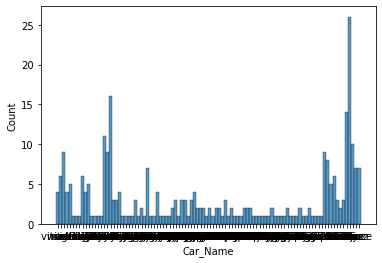

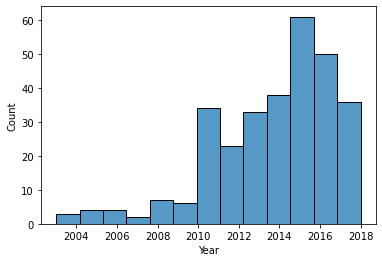

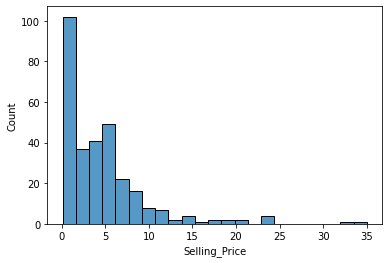

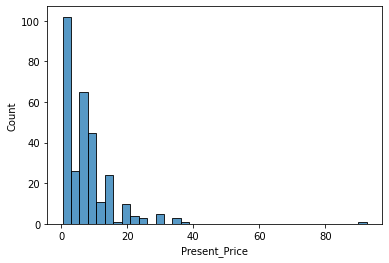

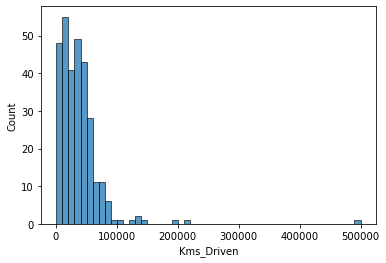

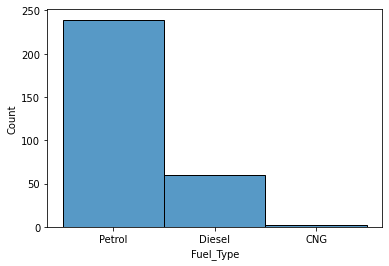

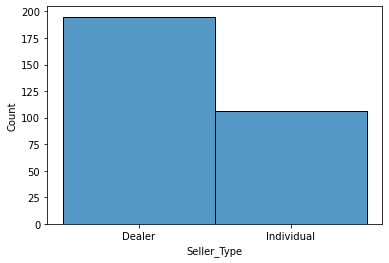

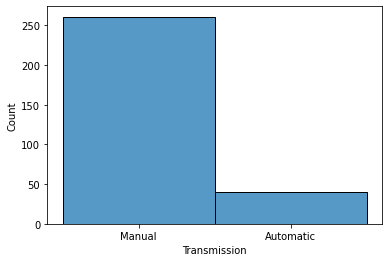

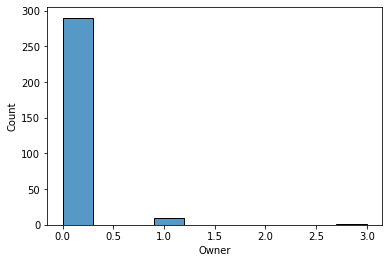

In [43]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

- Overall data types seems ok. 

In [44]:
df.duplicated().sum()

2

In [45]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Owner,0,0.0
Transmission,0,0.0
Seller_Type,0,0.0
Fuel_Type,0,0.0
Kms_Driven,0,0.0
Present_Price,0,0.0
Selling_Price,0,0.0
Year,0,0.0
Car_Name,0,0.0


- No missing values and no duplicates. Hurray!!!

In [46]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

- There is no zero variance variable. 

- Other than that there is no problem.

- Let's make a copy of the dataset and start to work on it.

In [47]:
df1= df.copy()

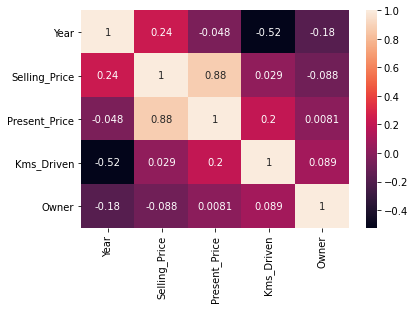

In [48]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [49]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [50]:
df["vehicle_age"] = 2021 - df.Year
#df.Year.max() - df.Year da yapılabilir hocam daha dinamik oluyor

In [51]:
df.drop(columns=['Year',"Car_Name"], inplace=True)

In [52]:
df=pd.get_dummies(df, drop_first=True)
#drop_first yaptığı iş gereksiz yere feature olayını egale edecek 3. kolon yok
#burada fazla kolon gelmedi

In [53]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>



In [54]:
X= df.drop('Selling_Price', axis=1)
y= df['Selling_Price']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [56]:
model = LinearRegression(normalize=True)

In [57]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, \
r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression(normalize=True) and  rmse score is : 2.8674343566763354, r2 score is 0.6936683295462105


In [65]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [66]:
print("Model intercept  : ", model.intercept_, "\n")
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051576997 

Present_Price :  0.445257969897629
Kms_Driven :  -1.8706729757021776e-05
Owner :  -0.8135775776586713
vehicle_age :  -0.31904776455888667
Fuel_Type_Diesel :  2.6192462729450976
Fuel_Type_Petrol :  0.6064868667913238
Seller_Type_Individual :  -1.2201674460429688
Transmission_Manual :  -1.0086828216162669


In [67]:
pd.DataFrame(model.coef_,columns=['Coefficient'])

,Coefficient
0,0.445258
1,-0.000019
2,-0.813578
3,-0.319048
4,2.619246
5,0.606487
6,-1.220167
7,-1.008683


In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
y_pred=model.predict(X_test)

In [72]:
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [73]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

In [75]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:31}".format(mae))
print('R2 score is {:26}'.format(R2_score))
# sonucum % de 86 oranında oğrulukla değerlendirme yaptı. Linear de anca bu kadar olur.

Model testing performance:
--------------------------
RMSE is             1.946054013887482
MAE is              1.1811769157076817
R2 score is         0.8589039971923135


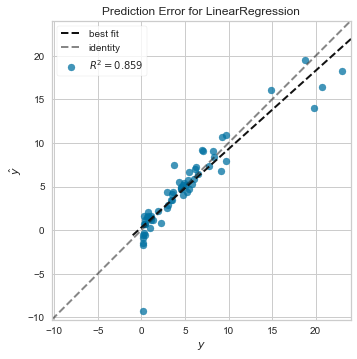

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [77]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_sample = results.head(25)
result_sample
# 25 satırdan baktım.Durum nedir hangi noktada hatalar nedir.

,Actual,Predicted
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
282,8.25,9.036746
279,6.25,7.273781
138,0.60,1.493600
50,14.90,16.022866
234,5.50,4.741886


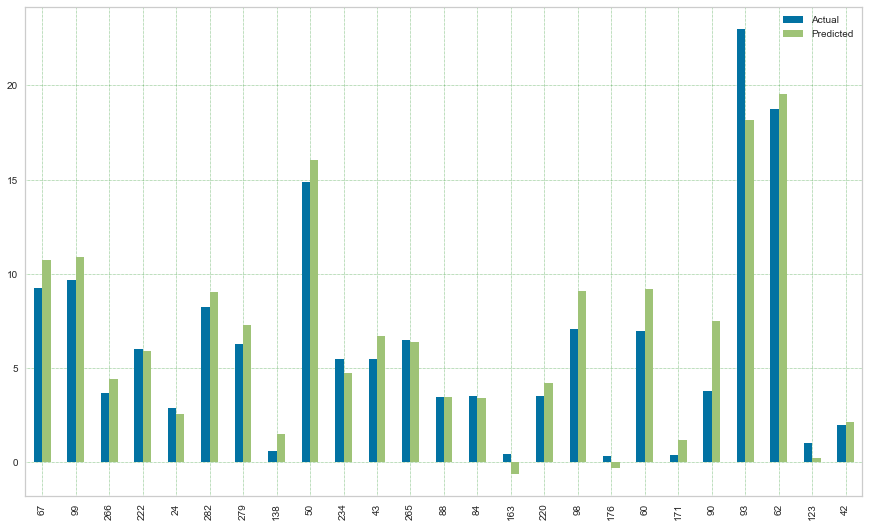

In [80]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()
# model gerçek ve tahmini inceledim.

In [81]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

In [83]:
from sklearn.linear_model import Ridge, RidgeCV
# minmax scaler ile yapalım

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# burası önemli scail işlemini sadece X_traine uyguladım leaks olmasın diye

In [86]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [87]:
X_test 
# taransform etti. öğrendi.scalil sonrassı

array([[2.18140442e-01, 2.75294118e-01, 0.00000000e+00, 5.33333333e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.18140442e-01, 2.33054118e-01, 0.00000000e+00, 5.33333333e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.23883832e-02, 1.62352941e-01, 0.00000000e+00, 2.66666667e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.88903338e-02, 3.62974118e-01, 0.00000000e+00, 2.66666667e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.43216298e-02, 2.65312941e-01, 0.00000000e+00, 3.33333333e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.48244473e-01, 2.94117647e-01, 0.00000000e+00, 2.66666667e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.43909840e-01, 1.86475294e-01, 0.00000000e+00, 2.66666667e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.

In [88]:
show_metrics(y_test,y_pred)
# ilk değerlendirmeye göre biraaz daha iyileşti.

Model testing performance:
--------------------------
RMSE is            1.9026594573849416
MAE is              1.185425017189817
R2 score is         0.8651263662232392


In [ ]:
# lambdanın alpha ya çevirdik.modelin alfa değeri 1 ken sonuç bu,
# hata eklerken kulllanılan katsayı hyper parameetre. alpha space oluştururken hangi değer daha iyi onu belirledik.

In [89]:
alpha_space= np.linspace(0.1,10,100)
alpha_space

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [90]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [91]:
ridgecv.alpha_
# alpha yı  0.1 aldı, bizim minumum değeri verdik onu aldık şimdi bakalım düşecekmi? deneyelim.

0.1

In [94]:
alpha_space = np.linspace(0.01, 10, 100)
alpha_space
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [98]:
ridgecv.alpha_
# şimdi de 0.21 arttı ilginç

0.21181818181818182

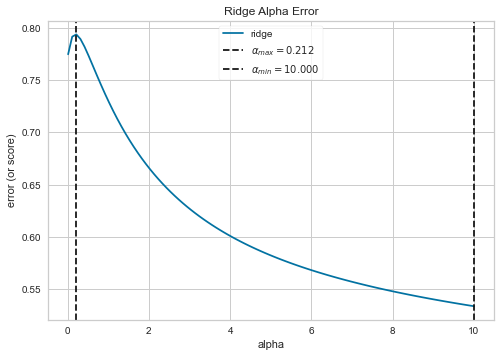

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [97]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

doğrudan prediction yapalım

In [100]:
y_pred=ridgecv.predict(X_test)

ridgecv ile hem regularization hem de cross validation yapıyoruz 

In [102]:
show_metrics(y_test,y_pred)
# 1 puan arttı

Model testing performance:
--------------------------
RMSE is            1.8181292744462774
MAE is             1.1382510736753337
R2 score is         0.8768443191837143


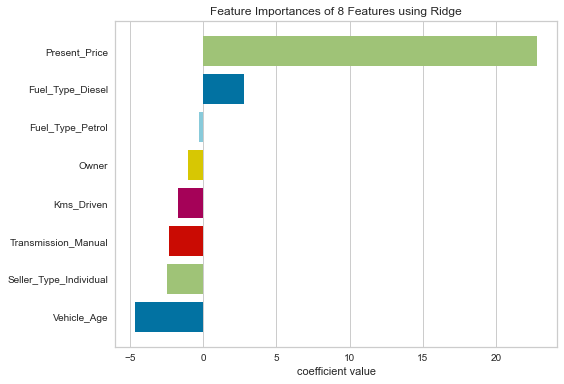

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [103]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

Bu tablo okunmalı

In [104]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [106]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)
# lasso kötü r2 score çoook düşük

Model testing performance:
--------------------------
RMSE is             4.844430603529284
MAE is             3.1983166124538154
R2 score is        0.12563974476813822


In [108]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [109]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)
# gayet iyi oldu alpha 0.01 oldu r2 score gayet iyi

Model testing performance:
--------------------------
RMSE is            1.9323214066935666
MAE is             1.1726681712627114
R2 score is         0.8608882992084925


In [111]:
lasso_cv_model.alpha_

0.001

In [58]:
print( f"Skewness: {df['Selling_Price'].skew()}")

Skewness: 2.493422417797524


In [61]:
df['Selling_Price'].iplot(kind='hist')

- Several features have gaussian-normal like ditsribution.
- I have also observed skewness.
- I'll look those in details.

In [20]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

In [21]:
df1[skew_cols.index].iplot(kind='hist');

In [22]:
df1[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)


- Since this is a beginner friendly notebook, let's see several options in the practice without touching our main dataset.
- First I'll show np.log method.
- Then I'll use transformation methods.

### With np.log

In [23]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



### With Power Transformer

In [24]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.108217
dtype: float64



- During the modelling process, we can use power transformer.

- Let's observe the correlation among the numerical features
- And also observe the correlation with the target variable

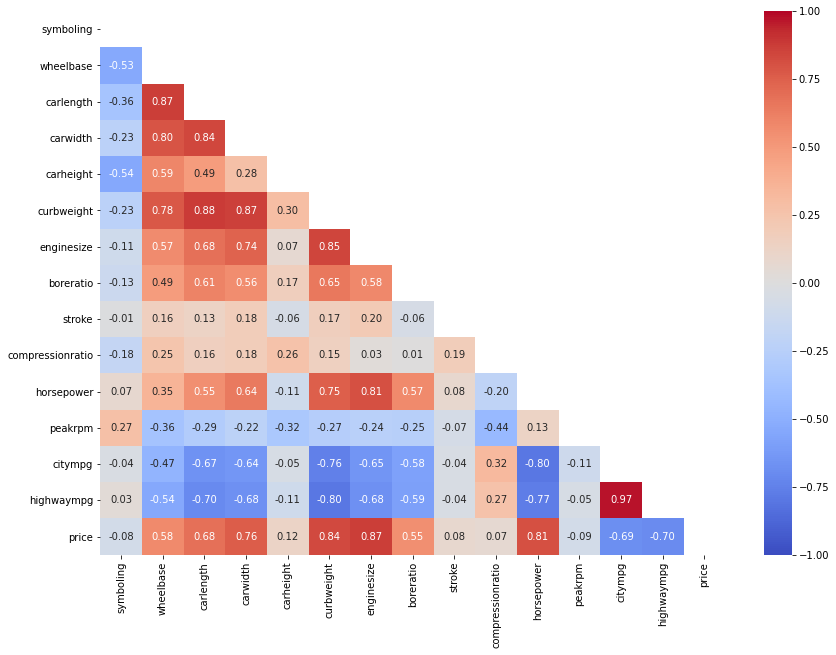

In [25]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

- We have 9 numerical features which have more than .5 correlation with the price variable.
- Which is a good sign for the prediction capability of the model, but still we need to see in the practice.
- From the threshold .9 perspective: Highwaympg and citympg has .97 correlation. We can drop one of them to avoid multicollinearity problems for the linear models.
- I have observed several highly correlated features below the .9 level.

- Let's drop the 'citympg'

In [26]:
df1 = df1.drop('citympg',axis=1)

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Categorical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [27]:
df1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


### Fuel Type & Price

In [28]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()
df1.groupby('fueltype')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



- Diesel cars are more expensive than cars with gas.

### Aspiration & Price

In [29]:
print(df1.groupby('aspiration')['price'].mean().sort_values())
print()
df1.groupby('aspiration')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64



Turbo aspiration is more expensive than standard aspiration

### Carbody & Price

In [30]:
print(df1.groupby('carbody')['price'].mean().sort_values())
print()
df1.groupby('carbody')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



- Based on the price, there are differences among the carbody.
- While Wagon cars the leats expensive ones, hardtop and the convertibles are the most expensive ones.

### Drivewheel & Price

In [31]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()
df1.groupby('drivewheel')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



- Rear wheel drive cars are the most expensive ones.  Front wheel cars the least expensive ones.

### Engine location & Price

In [32]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()
df1.groupby('enginelocation')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



- There is a quite difference based on the engine location. Rear engine location almost 3 times expensive than front ones.

### Engine type & Price

In [33]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()
df1.groupby('enginetype')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



- Our dataset has 7 different engine types and price changes amongs them significantly.

### Fuel system & Price

In [34]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()
df1.groupby('fuelsystem')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



- Our dataset has 8 different fuel system and price changes amongs them significantly.

### Model & Price

In [35]:
print(df1.groupby('model')['price'].mean().sort_values())
print()
df1.groupby('model')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



- Based on the model, Porsche, Buick and Jaguar are the most expensive ones.
- Chevroletis the least expensive model.

### Get the Dummies

In [36]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,model_Nissan,model_Porsche,model_Toyota,model_Volkswagen,model_alfa-romero,model_audi,model_bmw,model_buick,model_chevrolet,model_dodge,model_honda,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>MODEL SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- I'll use linear regression model as a base model
- And then I will use Ridge, Lasso, Elasticnet, KNeighborsRegressor and Support Vector MAchine Regressor
- And then i will use ensemble models, like Randomforest, Gradient Boosting and Extra Trees
-  Finally I will look at the XGBoost Regresson.
- And after evaluating the algorithm, we will select our best model.
- Let's start.

<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Baseline Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [37]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')




model : LinearRegression() and  rmse score is : 2650.560337022368, r2 score is 0.8985995076954822


- Baseline Model,in our case, Linear Regression model, without and scaling and transformation did a quite a good job.

<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Ridge &  Lasso  &  Elasticnet  &  KNN with Scaler and Transformer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [38]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2412.48, r2 score is 0.92
model : Lasso() and  rmse score is : 2307.47, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3394.06, r2 score is 0.83
model : KNeighborsRegressor() and  rmse score is : 4008.29, r2 score is 0.77


,RMSE,R2_Test
Ridge,2412.48,0.92
Lasso,2307.47,0.92
ElasticNet,3394.06,0.83
KNeighbors,4008.29,0.77


- By using standard scaler and power transformer for the skewness;
- For linear models we got .92 for the R2 and
- 2307.47 RMSE which are better scores compare to the baseline model.

<a id="9"></a>
<font color="lightseagreen" size=+1.5><b>Random Forest& Gradient Boosting & Extra Trees & XGBoost</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [39]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1984.44, r2 score is 0.9432
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2422.19, r2 score is 0.9153
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2641.67, r2 score is 0.8993
model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) and  rmse score is : 2416.1, r2 score is 0.9157


,RMSE,R2_Test
RandomForest,1984.44,0.94
GradientBoost,2422.19,0.92
ExtraTree,2641.67,0.90
XGB,2416.10,0.92


- Now we are talking.
- Random forest, without any tuning got .94 R2 and lowest RMSE.
- XGBoost also did a good job without any optimization / tuning.

<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Best Model with the Hyperparameter Tuning</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [40]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')




 rmse score is : 1975.8483, r2 score is 0.9437


- With hyperparameter tuning we got a lift. 
- RMSE (from 1984.44 to 1975.8483)
- R2 (from .9432 to .9437)

<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Feature Importance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.024
carheight : 0.004
curbweight : 0.167
enginesize : 0.6
boreratio : 0.005
stroke : 0.003
compressionratio : 0.005
horsepower : 0.028
peakrpm : 0.005
highwaympg : 0.118
enginetype_ohc : 0.001
model_bmw : 0.006



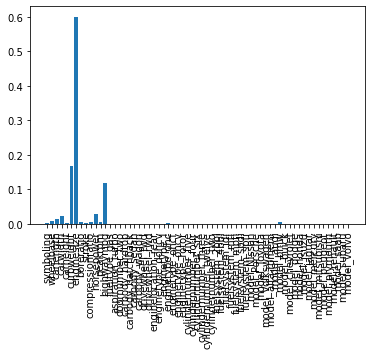

In [41]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

- Based on the Random Forest Regressor:
   - **enginesize**
   - **curbweight**
   - **highway mpg**
   - **horse power**
- have biggest importance scores.


- It is important to note that Random Forest Regressor gave importance score bigger than 0 to 16 features.
- Model used 16 out of 63 features to get best prediction.
- For [For deatiled discussion on the Feature Selection-The Most Common Methods to Know](https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know)

<a id="12"></a>
<font color="darkblue" size=+1.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


- We have developed model to predict car price problem.

- First, we  made the detailed exploratory analysis.
- We have decided which metric to use.
- We analyzed both target and features in detail.
- We transform categorical variables into numeric so we can use them in the model.
- We transform numerical variables to reduce skewness and get close to normal  distribution.
- We use pipeline to avoid data leakage.
- We looked at the results of the each model and selected the best one for the problem in hand.
- We made hyperparameter tuning of the best model see the improvement
- We looked at the feature importance.



- After this point it is up to you to develop and improve the models.  **Enjoy** 🤘

#### By the way, when you like the topic, you can show it by supporting 👍

####  **Feel free to leave a comment**. 

#### All the best 🤘

![](https://media.giphy.com/media/3jVT4U5bilspG/giphy.gif?cid=ecf05e47ijcazulbfateoqyazwbckrtfakr1olt4krmdycsd&rid=giphy.gif&ct=g)

gif credit: https://giphy.com/

<a id="13"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)